# Lysozyme Aggregation Assay

In [1]:
data = read.csv("data/LysAggregation_A7-A12_MasineAli.csv")

In [2]:
colnames(data)

[1] "Cycle.Nr."  "Time..s."   "Temp....C." "A7"         "A8"        
[6] "A9"         "A10"        "A11"        "A12"

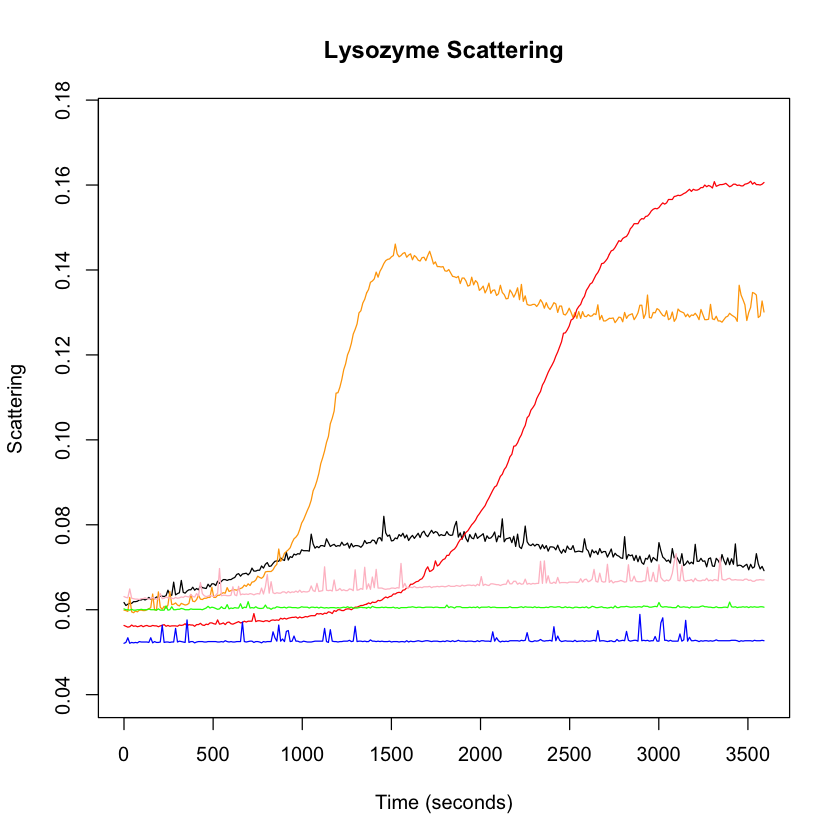

In [35]:
plot(x = data$Time..s., y = data$A7, col="black",
     type = "l", 
     ylim = c(0.04,0.175),
     xlab="Time (seconds)", ylab="Scattering",
     main="Lysozyme Scattering")
lines(x = data$Time..s., y = data$A8, col="orange")
lines(x = data$Time..s., y = data$A9, col="red")
lines(x = data$Time..s., y = data$A10, col="pink")
lines(x = data$Time..s., y = data$A11, col="blue")
lines(x = data$Time..s., y = data$A12, col="green")

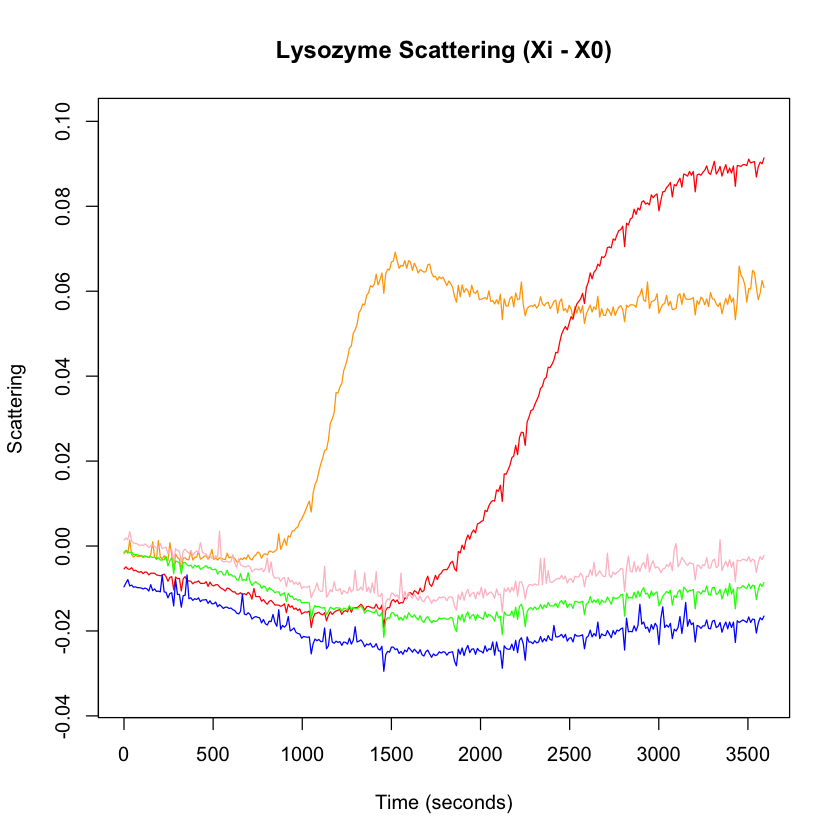

In [36]:
plot(x = data$Time..s., y = data$A8 - data$A7, col="orange",
     type = "l", 
     ylim = c(-0.035,0.1),
     xlab="Time (seconds)", ylab="Scattering",
     main="Lysozyme Scattering (Xi - X0)")
lines(x = data$Time..s., y = data$A9 - data$A7, col="red")

lines(x = data$Time..s., y = data$A10 - data$A7, col="pink")
lines(x = data$Time..s., y = data$A11 - data$A7, col="blue")
lines(x = data$Time..s., y = data$A12 - data$A7, col="green")